In [1]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="new_feature_1214.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [2]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["LUT"])
resource_origin_data_lut=resource_origin_data_lut.drop("FF",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)

In [3]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 229
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ARITLSHIFT                 212 non-null    int64  
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64  
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64  
 3   ARITLSHIFT_VALUE           212 non-null    int64  
 4   ARITRSHIFT                 212 non-null    int64  
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64  
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64  
 7   ARITRSHIFT_VALUE           212 non-null    int64  
 8   AlwaysConstructs           212 non-null    int64  
 9   AssignLHSPortNum           212 non-null    int64  
 10  AssignLHSWidth             212 non-null    int64  
 11  AssignRHSPortNum           212 non-null    int64  
 12  AssignRHSWidth             212 non-null    int64  
 13  AssignStmts                212 non-null    int64  

In [4]:
resource_origin_data_lut.describe()

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH,LUT
count,212.0,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.0,0.0,0.113208,0.070755,0.674528,0.386792,2.287736,2.924528,...,0.523585,3.886792,0.495283,0.561321,3.783019,124.339623,0.250000,2.844340,13.976415,32.731132
std,0.0,0.0,0.0,0.0,0.758156,0.524014,4.576129,2.801728,3.237406,10.205192,...,2.526525,8.233927,4.434353,4.076405,5.397041,705.919378,2.236863,8.446055,52.403144,85.157887
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,8.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,4.000000,0.000000,0.000000,4.000000,31.000000,0.000000,1.250000,2.000000,35.250000
max,0.0,0.0,0.0,0.0,8.000000,7.000000,56.000000,28.000000,24.000000,127.000000,...,31.000000,55.000000,62.000000,56.000000,32.000000,8202.000000,32.000000,65.000000,575.000000,948.000000


In [5]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)

LUT                          1.000000
CONDITIONALELSE              0.431417
NonBlockLeftWidth            0.417203
PLUS                         0.399622
NonBlockingAssign            0.393835
CONDITIONALTHEN              0.392870
CONDITIONALIF                0.392870
NonBlockingLeftPortNum       0.387136
REG                          0.318705
AlwaysConstructs             0.276555
CONDITIONALIFWIDTH           0.266208
REDAND                       0.251582
MIN                          0.232235
CASEITEMNUM                  0.232026
NonBlockRightWidth           0.229791
CASECONDITIONNUM             0.214073
OUTPUTWIDTH                  0.211457
AssignLHSWidth               0.201654
INPUTWIDTH                   0.192558
CASECONDITIONWIDTH           0.189411
AssignRHSWidth               0.180115
NonBlockingRightPortNum      0.179107
BlockAssign_Left_Width       0.143185
ARITRSHIFT_PORT_NUM          0.139558
WIREWIDTH                    0.136321
BLOCKINGASSIGN               0.133238
INPUT       

In [6]:
#特征优化
resource_lut = resource_origin_data_lut["LUT"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("LUT",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [7]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [8]:
X_valid_backup = X_valid

In [9]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [10]:
#深度学习

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [11]:
X_train.shape

(126, 59)

In [19]:
keras.backend.clear_session()
#input_ = keras.layers.Input(shape=X_train.shape[1:])
#hidden1 = keras.layers.Dense(59, activation="relu")(input_)
#hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
#concat = keras.layers.concatenate([input_, hidden2])
#output = keras.layers.Dense(1)(concat)
#model = keras.models.Model(inputs=[input_], outputs=[output])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

In [20]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(1)
])

In [21]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
4/4 [==============================] - 0s 28ms/step - loss: 9949.3086 - val_loss: 1118.5499
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 7952.5762 - val_loss: 156147.7031
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 20548.6621 - val_loss: 2358.9351
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 10111.0391 - val_loss: 2283.4719
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 10045.6855 - val_loss: 2254.7795
Epoch 6/10
4/4 [==============================] - 0s 15ms/step - loss: 9936.0020 - val_loss: 2255.0334
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 9787.2305 - val_loss: 2031.8914
Epoch 8/10
4/4 [==============================] - 0s 10ms/step - loss: 9543.6221 - val_loss: 1542.1068
Epoch 9/10
4/4 [==============================] - 0s 14ms/step - loss: 8926.2383 - val_loss: 1033.4735
Epoch 10/10
4/4 [==============================] - 0s 10ms/step - loss:

In [23]:
deep_predict = model.predict(X_valid)

In [24]:
rmse = np.sqrt(834.8270)
rmse

28.89337294259706

In [25]:
from sklearn.metrics import r2_score
r2_score(y_valid,deep_predict)

0.45464711024447024

In [90]:
X_valid_backup

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONIF,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH
1,0,0,0,0,0,0,0,0,3,3,...,3,3,5,0,0,6,55,0,5,50
74,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,2,64,0,0,0
195,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,4,26,0,0,0
64,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
114,0,0,0,0,0,0,0,0,3,0,...,0,0,6,0,0,2,26,0,0,0
106,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,3,3,0,0,0
8,0,0,0,0,7,0,0,28,1,7,...,0,0,0,0,0,8,92,0,7,90
209,0,0,0,0,0,0,0,0,17,30,...,5,5,35,0,0,18,63,1,47,194


In [110]:
y_valid

89       2.0
209     54.0
21      32.0
87       1.0
145      3.0
28       0.0
203    127.0
72     276.0
117      1.0
11      47.0
102     69.0
67       1.0
126     72.0
48       2.0
178     73.0
131    104.0
111      4.0
149     22.0
75      61.0
181      4.0
96     200.0
143      1.0
10      91.0
61       4.0
42       1.0
68     102.0
214     42.0
130      3.0
44       8.0
190     34.0
107     90.0
60      20.0
198      2.0
47       2.0
2      100.0
119      4.0
182     20.0
33      22.0
103      1.0
115      0.0
219     11.0
62       4.0
138      1.0
Name: LUT, dtype: float64

In [92]:
y_train_full

140      1.0
120     68.0
80      14.0
95       0.0
109    123.0
       ...  
118      0.0
17     170.0
104      1.0
195      0.0
114     44.0
Name: LUT, Length: 169, dtype: float64

In [26]:
plot_learning_curves(model, X_train_full, y_train_full)
plt.axis([0, 200, 0, 200])                         # not shown in the book
plt.show() 

1/1 [==============================] - 0s 4ms/step - loss: nan


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [111]:
predict = model.predict(X_valid)
predict

array([[-4.26856804e+00],
       [ 6.14976959e+01],
       [ 7.14575577e+01],
       [ 1.98475468e+00],
       [ 5.87914085e+00],
       [ 5.88872147e+00],
       [ 9.87386475e+01],
       [ 3.38187134e+02],
       [ 1.07103643e+01],
       [ 4.65599022e+01],
       [ 6.47305756e+01],
       [ 1.73598111e+00],
       [ 5.63512039e+01],
       [ 1.87781124e+01],
       [ 1.02937767e+02],
       [ 5.95165443e+01],
       [-2.63833046e+00],
       [ 9.45659332e+01],
       [ 7.27102585e+01],
       [ 4.62103844e+00],
       [ 2.21077612e+03],
       [-1.76898277e+00],
       [ 1.15266266e+02],
       [ 1.36818256e+01],
       [-1.79439914e+00],
       [ 1.24464516e+02],
       [ 3.08278275e+01],
       [ 6.07139778e+00],
       [ 3.37609787e+01],
       [ 2.21376076e+01],
       [ 1.62430725e+02],
       [ 2.72856026e+01],
       [ 1.37348976e+01],
       [ 1.87781124e+01],
       [ 1.26831169e+02],
       [ 1.32390499e+01],
       [ 1.33106308e+01],
       [ 4.01074257e+01],
       [ 1.9

In [112]:
y_valid

89       2.0
209     54.0
21      32.0
87       1.0
145      3.0
28       0.0
203    127.0
72     276.0
117      1.0
11      47.0
102     69.0
67       1.0
126     72.0
48       2.0
178     73.0
131    104.0
111      4.0
149     22.0
75      61.0
181      4.0
96     200.0
143      1.0
10      91.0
61       4.0
42       1.0
68     102.0
214     42.0
130      3.0
44       8.0
190     34.0
107     90.0
60      20.0
198      2.0
47       2.0
2      100.0
119      4.0
182     20.0
33      22.0
103      1.0
115      0.0
219     11.0
62       4.0
138      1.0
Name: LUT, dtype: float64

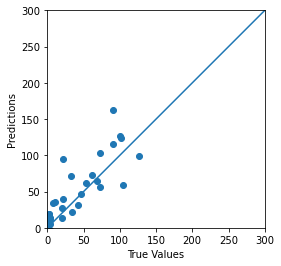

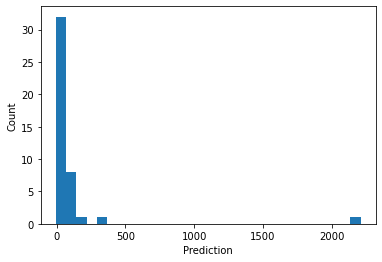

In [116]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_valid,predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,300]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(predict,bins=30)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.grid(False)
